In [4]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("/Users/thomassimmons/c/d/datasets/dirty_cafe_sales.csv")

In [6]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [7]:
df.isnull().sum()

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [14]:
df.dtypes

Transaction ID              object
Item                        object
Quantity                   float64
Price Per Unit             float64
Total Spent                float64
Payment Method              object
Location                    object
Transaction Date    datetime64[ns]
dtype: object

In [15]:
df['Payment Method'] = df['Payment Method'].replace('UNKNOWN', pd.NA)
df['Location'] = df['Location'].replace('UNKNOWN', pd.NA)

In [9]:
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors = 'coerce')

In [10]:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')

In [11]:
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')

In [16]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')

In [17]:
df.reset_index(drop=True)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,NaN,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,<NA>,<NA>,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2.0,2.0,4.0,NaN,<NA>,2023-08-30
9996,TXN_9659401,NaN,3.0,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3.0,NaN,3.0,Digital Wallet,NaN,2023-12-02


In [24]:
df = df.dropna(subset=['Total Spent', 'Payment Method', 'Location'])

In [25]:
df.shape

(4361, 8)

In [27]:
df.reset_index(drop=True)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
3,TXN_4433211,UNKNOWN,3.0,3.0,9.0,ERROR,Takeaway,2023-10-06
4,TXN_2548360,Salad,5.0,5.0,25.0,Cash,Takeaway,2023-11-07
...,...,...,...,...,...,...,...,...
4356,TXN_9933628,Smoothie,5.0,4.0,20.0,Cash,In-store,2023-07-20
4357,TXN_3142496,Smoothie,NaN,4.0,4.0,Cash,Takeaway,2023-07-27
4358,TXN_2858441,Sandwich,2.0,4.0,8.0,Credit Card,In-store,2023-12-14
4359,TXN_3897619,Sandwich,3.0,4.0,12.0,Cash,Takeaway,2023-02-24


In [35]:
df['Item'].head()

0       Coffee
1         Cake
4       Coffee
10       Salad
11    Sandwich
Name: Item, dtype: object

In [61]:
df = df[df['Item'] != 'Error']

In [36]:
df['Item'] = df['Item'].str.strip().str.title()

In [63]:
df.shape

(3089, 8)

In [65]:
df['Item'].value_counts().head(10)

Item
Juice       427
Salad       418
Sandwich    391
Cookie      391
Cake        385
Tea         372
Coffee      367
Smoothie    338
Name: count, dtype: int64

In [69]:
df['Payment Method'].value_counts(normalize=True)

Payment Method
Digital Wallet    0.346067
Cash              0.329556
Credit Card       0.324377
Name: proportion, dtype: float64

In [71]:
df['Location'].value_counts()

Location
Takeaway    1547
In-store    1542
Name: count, dtype: int64

In [72]:
df['Item'].value_counts()

Item
Juice       427
Salad       418
Sandwich    391
Cookie      391
Cake        385
Tea         372
Coffee      367
Smoothie    338
Name: count, dtype: int64

In [74]:
df['Price Per Unit'].value_counts()

Price Per Unit
3.0    812
4.0    729
5.0    418
1.0    391
1.5    372
2.0    367
Name: count, dtype: int64

In [75]:
df['Transaction Date'].value_counts()

Transaction Date
2023-03-13    20
2023-01-05    19
2023-11-06    16
2023-09-13    16
2023-06-30    15
              ..
2023-05-12     3
2023-05-13     2
2023-12-13     2
2023-04-27     1
2023-08-08     1
Name: count, Length: 365, dtype: int64

In [62]:
(df == 'Error').sum()

Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64

In [58]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
10,TXN_2548360,Salad,5.0,5.0,25.0,Cash,Takeaway,2023-11-07
12,TXN_7619095,Sandwich,2.0,4.0,8.0,Cash,In-store,2023-05-03


In [59]:
df['Item'].value_counts().head(10)

Item
Juice       427
Salad       418
Sandwich    391
Cookie      391
Cake        385
Tea         372
Coffee      367
Smoothie    338
Error       106
Name: count, dtype: int64

In [52]:
df = df[df['Payment Method'] != 'ERROR']
df = df[df['Location'] != 'ERROR']

In [76]:
df = df.dropna(subset=['Item', 'Price Per Unit', 'Transaction Date', 'Quantity'])

In [80]:
df['Item'].value_counts(normalize=True)

Item
Juice       0.138232
Salad       0.135319
Sandwich    0.126578
Cookie      0.126578
Cake        0.124636
Tea         0.120427
Coffee      0.118809
Smoothie    0.109421
Name: proportion, dtype: float64

In [82]:
df['Month'] = df['Transaction Date'].dt.to_period('M')

In [84]:
df['Month']

0       2023-09
1       2023-05
4       2023-06
10      2023-11
12      2023-05
         ...   
9975    2023-01
9979    2023-07
9986    2023-12
9991    2023-02
9999    2023-11
Name: Month, Length: 3089, dtype: period[M]

(array([636]), [Text(636, 0, 'Jan\n2023')])

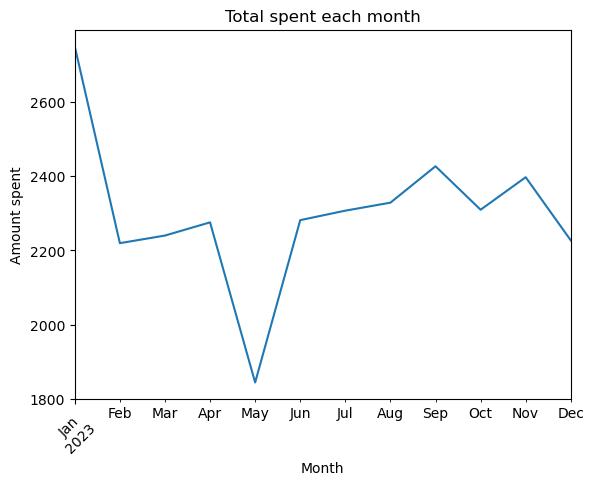

In [93]:
df.groupby('Month')['Total Spent'].sum().plot()
plt.title("Total spent each month")
plt.ylabel("Amount spent")
plt.xlabel('Month')
plt.xticks(rotation=45)

<Axes: xlabel='Item', ylabel='Total Spent'>

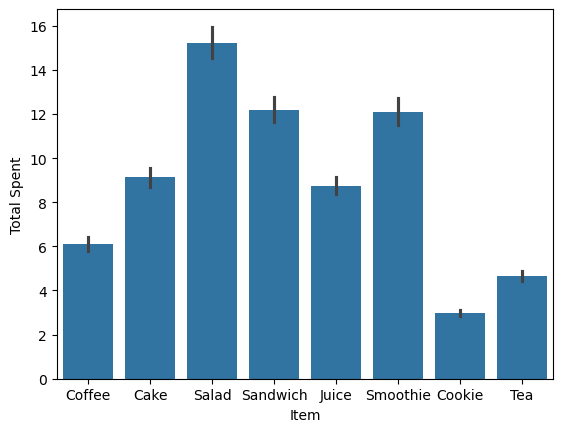

In [97]:
sns.barplot(data=df, x='Item', y='Total Spent')

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Juice'),
  Text(1, 0, 'Salad'),
  Text(2, 0, 'Sandwich'),
  Text(3, 0, 'Cookie'),
  Text(4, 0, 'Cake'),
  Text(5, 0, 'Tea'),
  Text(6, 0, 'Coffee'),
  Text(7, 0, 'Smoothie')])

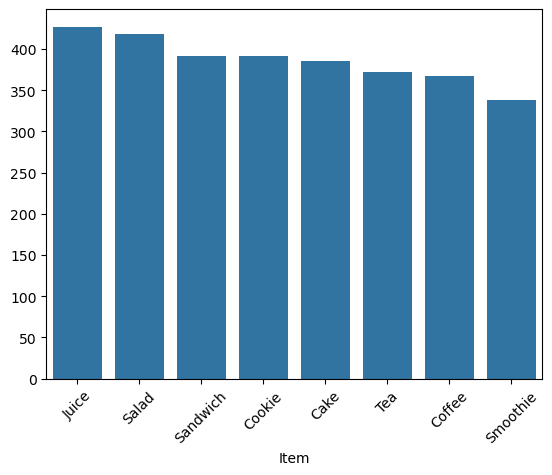

In [99]:
sns.barplot(x=df['Item'].value_counts().index, y=df['Item'].value_counts().values)
plt.xticks(rotation=45)

In [109]:
(df == "Error").sum()

Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
Month               0
dtype: int64

In [110]:
for col in df.columns:
    if isinstance(df[col].dtype, pd.PeriodDtype):
        df[col] = df[col].astype(str)


In [111]:
conn = sqlite3.connect("cafe_sales.db")

In [112]:
df.to_sql("sales", conn, if_exists='replace', index=False)

3089

In [113]:
query = """
SELECT Item, SUM("Total Spent") AS TotalRevenue
FROM sales
GROUP BY ITEM
ORDER BY TotalRevenue DESC
LIMIT 5;"""

pd.read_sql_query(query, conn)

,Item,TotalRevenue
0,Salad,6360.0
1,Sandwich,4772.0
2,Smoothie,4088.0
3,Juice,3735.0
4,Cake,3519.0
